In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [1]:
import sqlite3

conn = sqlite3.connect("../db.sqlite3")

query = pd.read_sql_query(
    'SELECT items.id, quantity, order_id, product_id, price, name, datetime '
    'FROM restaurant_orderitem AS items '
    'LEFT JOIN restaurant_product AS products '
    'ON items.product_id = products.id '
    'LEFT JOIN restaurant_order AS orders '
    'ON items.order_id = orders.id'
, conn)

df = pd.DataFrame(query)
df

,id,quantity,order_id,product_id,price,name,datetime
0,1,2,1,6,0.80,Plain Papadum,2019-08-03 20:25:00
1,2,1,1,240,12.95,King Prawn Balti,2019-08-03 20:25:00
2,3,1,1,19,2.95,Garlic Naan,2019-08-03 20:25:00
3,4,1,1,36,3.95,Mushroom Rice,2019-08-03 20:25:00
4,5,1,1,111,8.95,Paneer Tikka Masala,2019-08-03 20:25:00
...,...,...,...,...,...,...,...
74813,74814,2,3255,247,17.95,House Red wine 75cl,2016-05-18 18:53:00
74814,74815,2,12905,247,17.95,House Red wine 75cl,2016-05-14 19:28:00
74815,74816,2,3272,247,17.95,House Red wine 75cl,2016-05-10 13:18:00
74816,74817,1,11404,248,17.95,House white wine 75cl,2016-04-07 19:04:00


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

In [1]:
top_10_df = df.groupby('name').sum("quantity")["quantity"].sort_values(ascending=False).head(10).to_frame()

top_10_df

,quantity
name,
Plain Papadum,10648
Pilau Rice,6367
Plain Naan,4983
Garlic Naan,3318
Plain Rice,2964
Onion Bhajee,2749
Mango Chutney,2504
Chicken Tikka Masala,2473
Chapati,1935


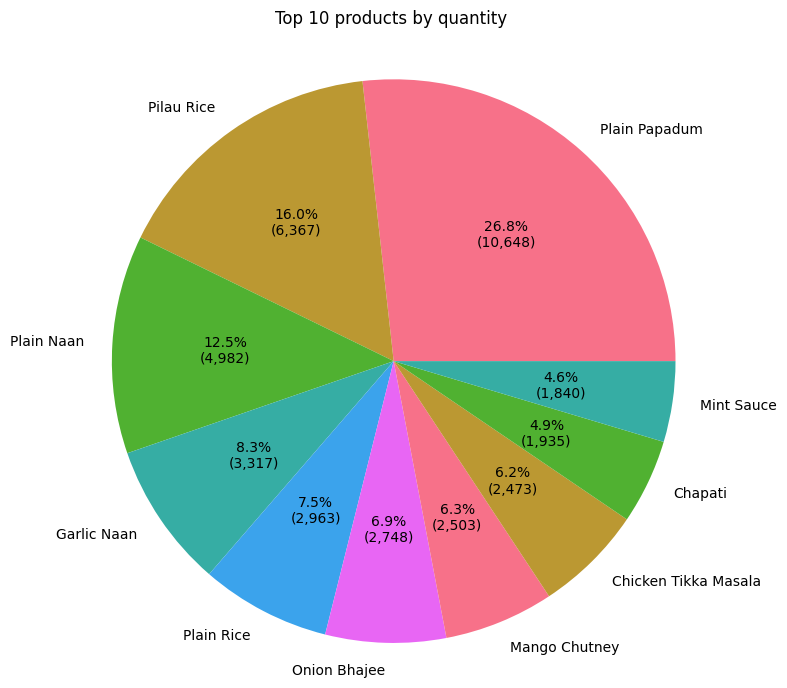

In [1]:
def representation_format(pct, all_vals):
    absolute = int(pct/100.*sum(all_vals))
    return "{:.1f}%\n({:,})".format(pct, absolute)

colors = sns.color_palette('husl')[0:10]

plt.figure(figsize=(8, 8))
plt.pie(top_10_df["quantity"], labels=top_10_df.index, colors=colors, autopct=lambda pct: representation_format(pct, top_10_df["quantity"]))
plt.title('Top 10 products by quantity \n')
plt.axis('equal')
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

In [1]:
df["price"] = pd.to_numeric(df["price"], errors='coerce')
df["Item Price"] = df["price"] * df["quantity"]
df

,id,quantity,order_id,product_id,price,name,datetime,Item Price
0,1,2,1,6,0.80,Plain Papadum,2019-08-03 20:25:00,1.60
1,2,1,1,240,12.95,King Prawn Balti,2019-08-03 20:25:00,12.95
2,3,1,1,19,2.95,Garlic Naan,2019-08-03 20:25:00,2.95
3,4,1,1,36,3.95,Mushroom Rice,2019-08-03 20:25:00,3.95
4,5,1,1,111,8.95,Paneer Tikka Masala,2019-08-03 20:25:00,8.95
...,...,...,...,...,...,...,...,...
74813,74814,2,3255,247,17.95,House Red wine 75cl,2016-05-18 18:53:00,35.90
74814,74815,2,12905,247,17.95,House Red wine 75cl,2016-05-14 19:28:00,35.90
74815,74816,2,3272,247,17.95,House Red wine 75cl,2016-05-10 13:18:00,35.90
74816,74817,1,11404,248,17.95,House white wine 75cl,2016-04-07 19:04:00,17.95


In [1]:
top_10_by_revenue = df.groupby('name').sum("Item Price")["Item Price"].sort_values(ascending=False).head(10).to_frame()
top_10_by_revenue

,Item Price
name,
Chicken Tikka Masala,22133.35
Pilau Rice,18782.65
Plain Naan,12955.80
Korma,12261.50
Bombay Aloo,10894.45
Onion Bhajee,10858.55
Butter Chicken,10626.60
Garlic Naan,9788.10
Korma - Chicken,9764.45


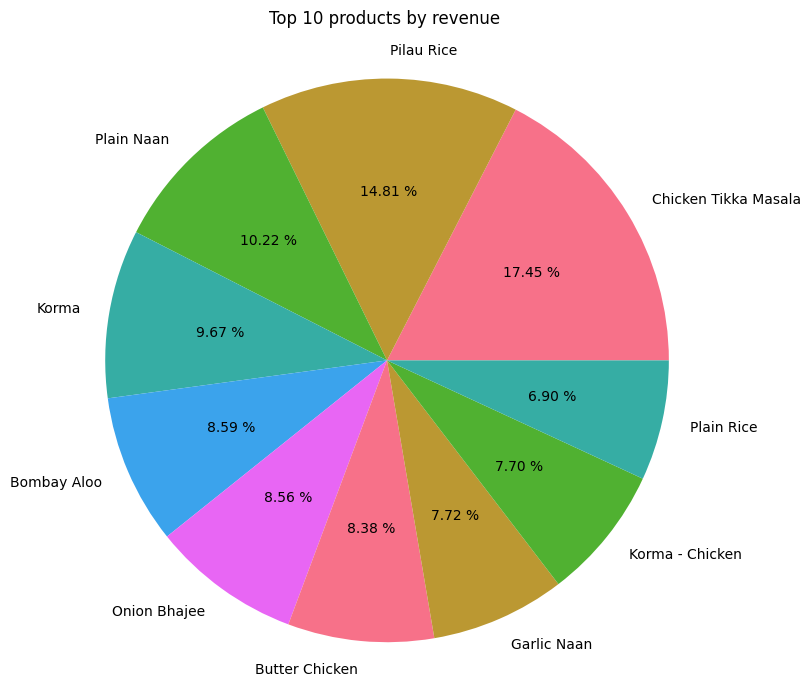

In [1]:
colors = sns.color_palette('husl')[0:10]

plt.figure(figsize=(8, 8))
plt.pie(top_10_by_revenue["Item Price"], labels=top_10_by_revenue.index, colors=colors, autopct='%1.2f %%')
plt.title('Top 10 products by revenue \n')
plt.axis('equal')
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

<Axes: xlabel='Order Hour', ylabel='Count'>

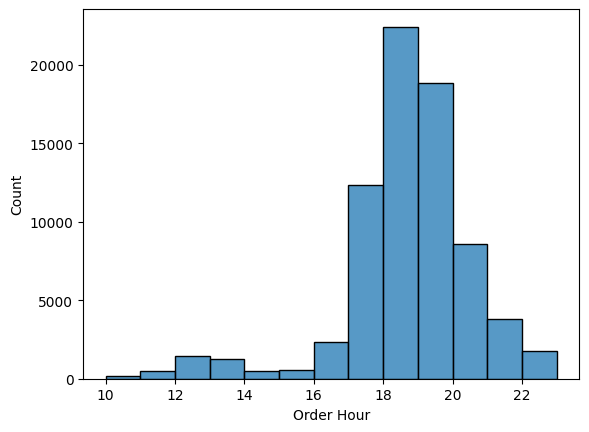

In [1]:
# write your code here
df["datetime"] = pd.to_datetime(df["datetime"])
df["Order Hour"] = df["datetime"].dt.hour

sns.histplot(df["Order Hour"], stat="count", bins=range(10, 24))

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

<Axes: xlabel='Order Day Of The Week', ylabel='Count'>

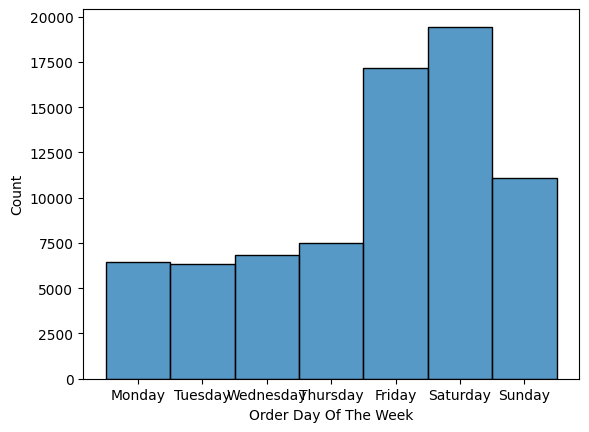

In [1]:
# write your code her
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

df["Order Day Of The Week"] = df["datetime"].dt.weekday.map(day_names)
df["Order Day Of The Week"] = pd.Categorical(df["Order Day Of The Week"], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

sns.histplot(df["Order Day Of The Week"], stat="count")
